# Introduction

We are a Team 35 - Junjie Qian, Meng Shen, and Tsz Lung Chan. We present here our insights into the Airbnb data. We focus on Boston’s data, for the very reason that some members studied or worked in Boston. Our main objective would be to assist Boston-based property investors’ decision making process by analyzing the rental data through short-term rental platforms like Airbnb. To this end, we need to answer the following question through our analysis:

* What are the main factors that influence Airbnb daily renting price?

# Data Import

The data is sourced from the [Inside Airbnb](http://insideairbnb.com/get-the-data.html) website which hosts publicly available data from the Airbnb site. The owners of the website have scraped data from AirBnB listings and aggregated it into data sets for various cities across the USA and the world. The latest data (from 09 February, 2019) covers 6,155 listings on AirBnB in Boston. Detailed listings data showing 106 features for each of the listings.

In [218]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
import statsmodels.api as sm
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)
from geopy.distance import vincenty
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')
mapbox_access_token = 'pk.eyJ1IjoiaHlzaGVubWVuZyIsImEiOiJjanZlMmJzeXQxNzNnM3lwOG9xaDJ3eDFpIn0.5Hj3HllTxIAMABNaBUuT3g'

In [219]:
# load listings data
Boston_listings0 = pd.read_csv('/Users/mengphilshen/Dropbox/Project/Data_Challenges/Proj_Airbnb/data/Boston/Boston_listings.csv')
Boston_listings0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6155 entries, 0 to 6154
Columns: 106 entries, id to reviews_per_month
dtypes: float64(25), int64(21), object(60)
memory usage: 5.0+ MB


In [3]:
# identify id and url features
id_url_cols = ['id',             
               'scrape_id',
               'host_id',
               'listing_url',
               'thumbnail_url',
               'medium_url',               
               'picture_url',
               'xl_picture_url',
               'host_url',
               'host_thumbnail_url',
               'host_picture_url',
               'zipcode']
Boston_listings0[id_url_cols].head()

,id,scrape_id,host_id,listing_url,thumbnail_url,medium_url,picture_url,xl_picture_url,host_url,host_thumbnail_url,host_picture_url,zipcode
0,3781,20190209175027,4804,https://www.airbnb.com/rooms/3781,NaN,NaN,https://a0.muscache.com/im/pictures/24670/b2de...,NaN,https://www.airbnb.com/users/show/4804,https://a0.muscache.com/im/users/4804/profile_...,https://a0.muscache.com/im/users/4804/profile_...,02128
1,5506,20190209175027,8229,https://www.airbnb.com/rooms/5506,NaN,NaN,https://a0.muscache.com/im/pictures/1598e8b6-5...,NaN,https://www.airbnb.com/users/show/8229,https://a0.muscache.com/im/users/8229/profile_...,https://a0.muscache.com/im/users/8229/profile_...,02119
2,6695,20190209175027,8229,https://www.airbnb.com/rooms/6695,NaN,NaN,https://a0.muscache.com/im/pictures/38ac4797-e...,NaN,https://www.airbnb.com/users/show/8229,https://a0.muscache.com/im/users/8229/profile_...,https://a0.muscache.com/im/users/8229/profile_...,02119
3,6976,20190209175027,16701,https://www.airbnb.com/rooms/6976,NaN,NaN,https://a0.muscache.com/im/pictures/85bf0653-b...,NaN,https://www.airbnb.com/users/show/16701,https://a0.muscache.com/im/pictures/d9075ba6-7...,https://a0.muscache.com/im/pictures/d9075ba6-7...,02131
4,8789,20190209175027,26988,https://www.airbnb.com/rooms/8789,NaN,NaN,https://a0.muscache.com/im/pictures/32210/7fdd...,NaN,https://www.airbnb.com/users/show/26988,https://a0.muscache.com/im/pictures/user/d7d71...,https://a0.muscache.com/im/pictures/user/d7d71...,02108


In [4]:
# identify datetime features
datetime_cols = ['last_scraped',                 
                 'calendar_last_scraped',
                 'host_since',
                 'first_review',
                 'last_review']
Boston_listings0[datetime_cols].head()

,last_scraped,calendar_last_scraped,host_since,first_review,last_review
0,2019-02-09,2019-02-09,2008-12-03,2015-07-10,2018-07-02
1,2019-02-09,2019-02-09,2009-02-19,2009-03-21,2018-11-18
2,2019-02-09,2019-02-09,2009-02-19,2009-08-06,2018-11-25
3,2019-02-09,2019-02-09,2009-05-11,2009-07-19,2018-10-23
4,2019-02-09,2019-02-09,2009-07-22,2014-08-12,2018-12-20


In [5]:
# identify textual features
textual_cols = ['name',
                'summary',
                'space',
                'description',
                'experiences_offered',
                'neighborhood_overview',
                'notes',
                'transit',
                'access',
                'interaction',
                'house_rules',
                'host_name',
                'host_location',
                'host_about',
                'host_response_time',
                'host_neighbourhood',
                'host_verifications',
                'street',
                'neighbourhood',
                'neighbourhood_cleansed',
                'neighbourhood_group_cleansed',
                'city',
                'state',
                'market',
                'smart_location',
                'country_code',
                'country',
                'property_type',
                'room_type',
                'bed_type',
                'amenities',
                'calendar_updated', 
                'cancellation_policy']
Boston_listings0[textual_cols].head()

,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,...,market,smart_location,country_code,country,property_type,room_type,bed_type,amenities,calendar_updated,cancellation_policy
0,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,This is a totally separate apartment located o...,Fully separate apartment in a two apartment bu...,none,"Mostly quiet ( no loud music, no crowed sidewa...",Building is on quiet side of airport. Building...,Local subway stop ( Maverick Station on the Bl...,Guests solely occupy the 1 floor apartment wit...,We sometimes travel. Always available via: mob...,...,Boston,"Boston, MA",US,United States,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",4 months ago,super_strict_30
1,**$79 Special ** Private! Minutes to center!,This is a private guest room with private bath...,**THE BEST Value in BOSTON!!*** PRIVATE GUEST ...,This is a private guest room with private bath...,none,"Peacful, Architecturally interesting, historic...","Guest room is on the 3rd floor, Steps are req...","Excellent Access to all of Boston, Walk to Mus...",You get full access to the guest room with pri...,"We give guests privacy, but we are available ...",...,Boston,"Boston, MA",US,United States,Guest suite,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",today,strict_14_with_grace_period
2,$99 Special!! Home Away! Condo,NaN,** WELCOME *** FULL PRIVATE APARTMENT In a His...,** WELCOME *** FULL PRIVATE APARTMENT In a His...,none,"Peaceful, Architecturally interesting, histori...",Check out some of the other accommodations we ...,"We are a 5 minute walk to the subway, 5 minut...","Full Private apartment. 1 bedroom, kitchen, ...",NaN,...,Boston,"Boston, MA",US,United States,Condominium,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",today,strict_14_with_grace_period
3,Mexican Folk Art Haven in Boston Residential Area,Come stay with me in Boston's Roslindale neigh...,"This is a well-maintained, two-family house bu...",Come stay with me in Boston's Roslindale neigh...,none,The LOCATION: Roslindale is a safe and diverse...,"There is no smoking allowed, inside the apartm...","PUBLIC TRANSPORTATION: From the house, quick p...","You can have access to your room, the adjacent...",ABOUT ME: I am one of the original Boston AIRB...,...,Boston,"Boston, MA",US,United States,Apartment,Private room,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",today,moderate
4,Curved Glass Studio/1bd facing Park,"Bright, 1 bed with curved glass windows facing...",Fully Furnished studio with enclosed bedroom. ...,"Bright, 1 bed with curved glass windows facing...",none,Beacon Hill is a historic neighborhood filled ...,Guests should expect to show government ID to ...,The MBTA site is a great reference for public ...,Guests have access to the full unit,I'm available for questions and/or issues.,...,Boston,"Boston, MA",US,United States,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",yesterday,strict_14_with_grace_period


In [6]:
# identify numeric features
numeric_cols = ['host_acceptance_rate',
                'host_listings_count',
                'host_total_listings_count',
                'neighbourhood_group_cleansed',
                'accommodates',
                'bathrooms',
                'bedrooms',
                'beds',
                'square_feet',
                'guests_included',
                'minimum_nights',
                'maximum_nights',
                'minimum_minimum_nights',
                'maximum_minimum_nights',
                'minimum_maximum_nights',
                'maximum_maximum_nights',
                'minimum_nights_avg_ntm',
                'maximum_nights_avg_ntm',
                'availability_30',
                'availability_60',
                'availability_90',
                'availability_365',
                'number_of_reviews',
                'number_of_reviews_ltm',
                'review_scores_rating',
                'review_scores_accuracy',
                'review_scores_cleanliness',
                'review_scores_checkin',
                'review_scores_communication',
                'review_scores_location',
                'review_scores_value',
                'license',
                'jurisdiction_names',
                'reviews_per_month',
                'calculated_host_listings_count',
                'calculated_host_listings_count_entire_homes',
                'calculated_host_listings_count_private_rooms',
                'calculated_host_listings_count_shared_rooms']
Boston_listings0[numeric_cols].head()

,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,...,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,reviews_per_month,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,NaN,4.0,4.0,NaN,2,1.0,1.0,1.0,NaN,2,...,10.0,10.0,10.0,NaN,NaN,0.32,1,1,0,0
1,NaN,6.0,6.0,NaN,2,1.0,1.0,1.0,225.0,1,...,10.0,9.0,10.0,NaN,NaN,0.66,6,6,0,0
2,NaN,6.0,6.0,NaN,4,1.0,1.0,2.0,NaN,2,...,10.0,9.0,9.0,NaN,NaN,0.73,6,6,0,0
3,NaN,1.0,1.0,NaN,2,1.0,1.0,1.0,NaN,1,...,10.0,9.0,10.0,NaN,NaN,0.64,1,0,1,0
4,NaN,11.0,11.0,NaN,2,1.0,1.0,1.0,NaN,1,...,10.0,10.0,9.0,NaN,NaN,0.40,10,10,0,0


# Data Wrangling

## Missing Values

The data has null values. As we see, the following features with missing% > 90%: 

  + host_acceptance_rate
  
  + thumbnail_url

  + neighbourhood_group_cleansed
 
  + jurisdiction_names
  
  + xl_picture_url
  
  + thumbnail_url

  + medium_url
 
  + square_feet
  
  + weekly_price
 
  + monthly_price
   
Therefore, it is worth to drop the rows and columns containing null values before performing further analysis.  

In [220]:
# check missing values
missing_data = Boston_listings0.isnull().sum(axis = 0).reset_index()
missing_data.columns = ['variable', 'missing values']
missing_data['missing%'] = missing_data['missing values'] / Boston_listings0.shape[0] * 100
missing_data_srt = missing_data.sort_values('missing%', ascending = False).reset_index(drop = True)
missing_data_srt[missing_data_srt['missing%'] > 0]

,variable,missing values,missing%
0,host_acceptance_rate,6155,100.000000
1,thumbnail_url,6155,100.000000
2,neighbourhood_group_cleansed,6155,100.000000
3,jurisdiction_names,6155,100.000000
4,license,6155,100.000000
5,xl_picture_url,6155,100.000000
6,medium_url,6155,100.000000
7,square_feet,6057,98.407799
8,weekly_price,5628,91.437855
9,monthly_price,5626,91.405361


## Feature Engineering 

Some of the features in the data does not contain data in the required format and hence are manipulated in a way that their meanings are retained.

### Convert string monetary values to numeric monetary values

Some string monetary values need to be converted into numeric monetary values. For example, look on price columns, they are strings because of '$' sign before the price:

In [221]:
# identify monetary features
monetary_cols = ['price', 
                 'weekly_price', 
                 'monthly_price', 
                 'security_deposit', 
                 'cleaning_fee', 
                 'extra_people']
Boston_listings0[monetary_cols].head()

,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people
0,$125.00,$750.00,"$2,250.00",$0.00,$75.00,$0.00
1,$145.00,$980.00,"$3,000.00",$0.00,$40.00,$0.00
2,$169.00,NaN,NaN,NaN,$70.00,$8.00
3,$65.00,$395.00,"$1,350.00",$0.00,$0.00,$30.00
4,$99.00,"$1,200.00","$2,900.00","$1,000.00",$250.00,$0.00


In [222]:
# define strPrice_to_numPrice function
def strPrice_to_numPrice(price_string):
    '''
    Converts USD prices from string to numeric format
    
    Args:
        price_string (string): USD price in string format (e.g., '$123,456.00')
    
    Returns:
        price_numeric (float): USD price in numeric format (e.g., 123456.00)
    '''
    
    price_numeric = float(str(price_string).replace(',', '').split('$')[-1])
    return price_numeric

In [223]:
# apply strPrice_to_numPrice function over monetary features
Boston_listings1 = Boston_listings0.copy()
for col in monetary_cols:
    Boston_listings1[col] = Boston_listings1[col].apply(strPrice_to_numPrice)
Boston_listings1[monetary_cols].head()

,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people
0,125.0,750.0,2250.0,0.0,75.0,0.0
1,145.0,980.0,3000.0,0.0,40.0,0.0
2,169.0,NaN,NaN,NaN,70.0,8.0
3,65.0,395.0,1350.0,0.0,0.0,30.0
4,99.0,1200.0,2900.0,1000.0,250.0,0.0


### Convert string boolean values to numeric boolean values

Also, some of the categorical columns are in fact Boolean and require conversion:

In [224]:
# identify boolean features
boolean_cols = ['host_is_superhost', 
                'host_has_profile_pic',
                'host_identity_verified',
                'is_location_exact',
                'has_availability',
                'requires_license',
                'instant_bookable',
                'is_business_travel_ready',
                'require_guest_profile_picture',
                'require_guest_phone_verification']
Boston_listings1[boolean_cols].head()

,host_is_superhost,host_has_profile_pic,host_identity_verified,is_location_exact,has_availability,requires_license,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification
0,t,t,f,t,t,f,f,f,f,f
1,t,t,t,t,t,f,t,f,f,f
2,t,t,t,t,t,f,t,f,f,f
3,t,t,t,t,t,f,f,f,t,f
4,f,t,f,t,t,f,f,f,f,f


In [225]:
# define strBoolean_to_numBoolean function
def strBoolean_to_numBoolean(s):
    '''
    Converts "first letter boolean" strings to integers
    
    Args:
        bool_string (string): 't', 'f' or other
    
    Returns:
        bool_number (int): 1, 0 or None
    '''
        
    if s == 'f':
        return 0
    elif s == 't':
        return 1
    return None

In [226]:
# apply strBoolean_to_numBoolean function over boolean features
Boston_listings2 = Boston_listings1.copy()
for col in boolean_cols:
    Boston_listings2[col] = Boston_listings2[col].apply(strBoolean_to_numBoolean)
Boston_listings2[boolean_cols].head()

,host_is_superhost,host_has_profile_pic,host_identity_verified,is_location_exact,has_availability,requires_license,instant_bookable,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification
0,1.0,1.0,0.0,1,1,0,0,0,0,0
1,1.0,1.0,1.0,1,1,0,1,0,0,0
2,1.0,1.0,1.0,1,1,0,1,0,0,0
3,1.0,1.0,1.0,1,1,0,0,0,1,0
4,0.0,1.0,0.0,1,1,0,0,0,0,0


### Create location features

We want to add geographical distance to city center (Boston center's coordinates comes from [here](http://dateandtime.info/citycoordinates.php))

In [227]:
# sepecify coordinates of Boston
Boston_listings3 = Boston_listings2.copy()
Boston_listings3['lat_center'] = 42.3584300
Boston_listings3['lon_center'] = -71.0597700

In [228]:
# calculates vincenty distance
Boston_listings3['distance_to_center'] = Boston_listings3.apply(lambda x: vincenty((x['latitude'], x['longitude']), (x['lat_center'], x['lon_center'])).km, axis = 1)

In [229]:
# check neighbourhood
Boston_listings3['neighbourhood_cleansed'].value_counts()

Dorchester                 537
Jamaica Plain              514
Back Bay                   494
Downtown                   453
South End                  445
Fenway                     440
Brighton                   358
South Boston               338
Allston                    329
Roxbury                    319
East Boston                311
Beacon Hill                255
North End                  245
Mission Hill               214
Charlestown                156
West End                   154
Chinatown                  139
Roslindale                 117
South Boston Waterfront     76
Mattapan                    75
West Roxbury                70
Hyde Park                   59
Bay Village                 39
Longwood Medical Area       11
Leather District             7
Name: neighbourhood_cleansed, dtype: int64

In [230]:
# check mean distance by neighbourhood
Boston_listings3.groupby('neighbourhood_cleansed').aggregate({'distance_to_center':'mean'}).sort_values(by='distance_to_center', ascending = False)

,distance_to_center
neighbourhood_cleansed,
Hyde Park,12.656535
West Roxbury,11.921203
Roslindale,10.301550
Mattapan,9.391573
Brighton,7.809407
Jamaica Plain,6.404661
Dorchester,6.209009
Allston,6.031841
Mission Hill,4.960178


In [231]:
# check mean price by neighbourhood
Boston_listings3.groupby('neighbourhood_cleansed').aggregate({'price':'mean'}).sort_values(by='price', ascending = True)

,price
neighbourhood_cleansed,
Hyde Park,81.118644
Roslindale,84.094017
Mattapan,84.520000
West Roxbury,107.085714
Brighton,112.220670
Longwood Medical Area,115.727273
East Boston,127.398714
Allston,140.227964
Jamaica Plain,145.793774


Based on the geographical distance to city center, we create some location features: 

 + **far_south**: Hyde Park, West Roxbury, Roslindale, Mattapan
 + **middle_south**: Jamaica Plain, Dorchester
 + **near_south**: Mission Hill, Fenway, Longwood Medical Area, Roxbury, South Boston, South End
 + **west**: Brighton, Allston
 + **east**: East Boston
 + **north**: Charlestown
 + **center**: Downtown, Beacon Hill, Leather District, Chinatown, North End, West End, Bay Village, Back Bay, South Boston Waterfront

In [232]:
# create location features
far_south = ['Hyde Park', 'West Roxbury', 'Roslindale', 'Mattapan']
middle_south = ['Jamaica Plain', 'Dorchester']
near_south = ['Mission Hill', 'Fenway', 'Longwood Medical Area', 'Roxbury', 'South Boston', 'South End']
west = ['Brighton', 'Allston']
east = ['East Boston']
north = ['Charlestown']
center = ['Downtown', 'Beacon Hill', 'Leather District', 'Chinatown', 'North End', 'West End', 
          'Bay Village', 'Back Bay', 'South Boston Waterfront']
Boston_listings3['is_far_south'] = Boston_listings3['neighbourhood_cleansed'].apply(lambda s: int(s in far_south))
Boston_listings3['is_middle_south'] = Boston_listings3['neighbourhood_cleansed'].apply(lambda s: int(s in middle_south))
Boston_listings3['is_near_south'] = Boston_listings3['neighbourhood_cleansed'].apply(lambda s: int(s in near_south))
Boston_listings3['is_west'] = Boston_listings3['neighbourhood_cleansed'].apply(lambda s: int(s in west))
Boston_listings3['is_east'] = Boston_listings3['neighbourhood_cleansed'].apply(lambda s: int(s in east))
Boston_listings3['is_north'] = Boston_listings3['neighbourhood_cleansed'].apply(lambda s: int(s in north))
Boston_listings3['is_center'] = Boston_listings3['neighbourhood_cleansed'].apply(lambda s: int(s in center))
Boston_listings3[['neighbourhood_cleansed', 'distance_to_center', 'is_far_south', 'is_middle_south', 'is_near_south', 'is_west', 'is_east', 'is_north', 'is_center']].head()

,neighbourhood_cleansed,distance_to_center,is_far_south,is_middle_south,is_near_south,is_west,is_east,is_north,is_center
0,East Boston,2.616808,0,0,0,0,1,0,0
1,Roxbury,4.338483,0,0,1,0,0,0,0
2,Roxbury,4.212168,0,0,1,0,0,0,0
3,Roslindale,9.642258,1,0,0,0,0,0,0
4,Downtown,0.251808,0,0,0,0,0,0,1


### Create amenities features

We create some amenities features, is_Wifi, is_TV, is_Washer_Dryer, and is_Kitchen:

In [233]:
# create amenities features
Boston_listings3['is_Wifi'] = Boston_listings3['amenities'].apply(lambda s: int('wifi' in str(s.lower())[1:].split(',')))
Boston_listings3['is_TV'] = Boston_listings3['amenities'].apply(lambda s: int('tv' in str(s.lower())[1:].split(',')))
Boston_listings3['is_Washer_Dryer'] = Boston_listings3['amenities'].apply(lambda s: int('dryer' in str(s.lower())[1:].split(',')))
Boston_listings3['is_Kitchen'] = Boston_listings3['amenities'].apply(lambda s: int('kitchen' in str(s.lower())[1:].split(',')))
Boston_listings3[['is_Wifi', 'is_TV', 'is_Washer_Dryer', 'is_Kitchen']].head()

,is_Wifi,is_TV,is_Washer_Dryer,is_Kitchen
0,1,1,1,1
1,1,1,1,0
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1


### Encode categorical features

Since most machine learning models can not handle categorical features directly, we have to turn nominal categorical features into features with numeric values. 

In [234]:
# check categorical features
catFeatures = ['room_type',
               'property_type',
               'bed_type']
for col in catFeatures:
    print("\n")
    print(col)
    print(Boston_listings3[col].value_counts())



room_type
Entire home/apt    4011
Private room       2072
Shared room          72
Name: room_type, dtype: int64


property_type
Apartment             4074
House                  912
Condominium            569
Serviced apartment     173
Townhouse              135
Guest suite             72
Other                   58
Loft                    49
Bed and breakfast       47
Boutique hotel          19
Boat                    14
Guesthouse               9
Villa                    7
Hotel                    5
Bungalow                 4
Camper/RV                2
Resort                   2
Barn                     1
Tiny house               1
Aparthotel               1
Chalet                   1
Name: property_type, dtype: int64


bed_type
Real Bed         6078
Futon              29
Airbed             25
Pull-out Sofa      19
Couch               4
Name: bed_type, dtype: int64


In [22]:
# encode categorical features
Boston_listings4 = Boston_listings3.copy()
Boston_listings4['room_type_Entire home/apt'] = Boston_listings4['room_type'].apply(lambda s: int(s == 'Entire home/apt'))
Boston_listings4['room_type_Private room'] = Boston_listings4['room_type'].apply(lambda s: int(s == 'Private room'))
Boston_listings4['room_type_Shared room'] = Boston_listings4['room_type'].apply(lambda s: int(s == 'Shared room'))
Boston_listings4.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,is_east,is_north,is_center,is_Wifi,is_TV,is_Washer_Dryer,is_Kitchen,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,3781,https://www.airbnb.com/rooms/3781,20190209175027,2019-02-09,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,This is a totally separate apartment located o...,Fully separate apartment in a two apartment bu...,none,"Mostly quiet ( no loud music, no crowed sidewa...",...,1,0,0,1,1,1,1,1,0,0
1,5506,https://www.airbnb.com/rooms/5506,20190209175027,2019-02-09,**$79 Special ** Private! Minutes to center!,This is a private guest room with private bath...,**THE BEST Value in BOSTON!!*** PRIVATE GUEST ...,This is a private guest room with private bath...,none,"Peacful, Architecturally interesting, historic...",...,0,0,0,1,1,1,0,1,0,0
2,6695,https://www.airbnb.com/rooms/6695,20190209175027,2019-02-09,$99 Special!! Home Away! Condo,NaN,** WELCOME *** FULL PRIVATE APARTMENT In a His...,** WELCOME *** FULL PRIVATE APARTMENT In a His...,none,"Peaceful, Architecturally interesting, histori...",...,0,0,0,1,1,1,1,1,0,0
3,6976,https://www.airbnb.com/rooms/6976,20190209175027,2019-02-09,Mexican Folk Art Haven in Boston Residential Area,Come stay with me in Boston's Roslindale neigh...,"This is a well-maintained, two-family house bu...",Come stay with me in Boston's Roslindale neigh...,none,The LOCATION: Roslindale is a safe and diverse...,...,0,0,0,1,1,1,1,0,1,0
4,8789,https://www.airbnb.com/rooms/8789,20190209175027,2019-02-09,Curved Glass Studio/1bd facing Park,"Bright, 1 bed with curved glass windows facing...",Fully Furnished studio with enclosed bedroom. ...,"Bright, 1 bed with curved glass windows facing...",none,Beacon Hill is a historic neighborhood filled ...,...,0,0,1,1,1,1,1,1,0,0


# Exploratory Data Analysis

## Numeric Variables

First, we drop the following uninformative numeric features:  

* host_acceptance_rate
  
* square_feet
  
* weekly_price
 
* monthly_price
  
* minimum_minimum_nights
  
* maximum_maximum_nights
  
* maximum_minimum_nights
  
* minimum_maximum_nights
 
* minimum_nights_avg_ntm
  
* maximum_nights_avg_ntm
  
* host_total_listings_count
  
* calculated_host_listings_count_entire_homes
 
* calculated_host_listings_count_private_rooms
  
* calculated_host_listings_count_shared_rooms 
  

After correlation analysis, the below features should be droped due to their extreme high correlations with other features:

* availability_30

* availability_60

* availability_90

* number_of_reviews

* number_of_reviews_ltm

* review_scores_accuracy
          
* review_scores_cleanliness

* review_scores_checkin

* review_scores_communication

* review_scores_location

* review_scores_value

In [235]:
# create a list of numeric variables
numVar = ['price', 
          'security_deposit', 
          'cleaning_fee', 
          'extra_people',
          'distance_to_center',
          'accommodates',
          'bathrooms',
          'bedrooms',
          'beds',
          'guests_included',
          'minimum_nights',
          'maximum_nights',
          'availability_30',
          'availability_60',
          'availability_90',
          'availability_365',
          'number_of_reviews',
          'number_of_reviews_ltm',        
          'reviews_per_month',
          'review_scores_rating',
          'review_scores_accuracy',
          'review_scores_cleanliness',
          'review_scores_checkin',
          'review_scores_communication',
          'review_scores_location',
          'review_scores_value',
          'host_listings_count',
          'latitude',
          'longitude']

In [236]:
# check correlations
corrmat = Boston_listings4[numVar].corr()
figure = ff.create_annotated_heatmap(
         z=corrmat.values,
         x=list(corrmat.columns),
         y=list(corrmat.index),
         annotation_text=corrmat.round(2).values,
         showscale=True)
iplot(figure)

In [237]:
# create a list of numeric variables to keep
numVar_to_keep = ['price', 
                  'security_deposit', 
                  'cleaning_fee', 
                  'extra_people',
                  'distance_to_center',
                  'accommodates',
                  'bathrooms',
                  'bedrooms',
                  'beds',
                  'guests_included',
                  'minimum_nights',
                  'maximum_nights',
                  'availability_365',
                  'reviews_per_month',
                  'review_scores_rating',
                  'host_listings_count',
                  'latitude',
                  'longitude']

## Categorical Variables

Next, we drop the following uninformative categorical features:  

* host_response_time
  
* cancellation_policy
  
* host_has_profile_pic
 
* host_identity_verified
  
* is_location_exact
  
* instant_bookable
  
* require_guest_profile_picture
  
* require_guest_phone_verification

Because of one-hot-encoding, the below level to avoid collinearity:

* neighbourhood_cleansed_Leather District

* room_type_Shared room

In [238]:
# create a list of categorical variables
catVar = ['host_is_superhost', 
          'is_Wifi',
          'is_TV',
          'is_Washer_Dryer',
          'is_Kitchen',
          'is_far_south', 
          'is_middle_south', 
          'is_near_south', 
          'is_west', 
          'is_east', 
          'is_north', 
          'is_center',
          'room_type_Entire home/apt',
          'room_type_Private room',
          'room_type_Shared room']

In [239]:
# check categorical features
for col in catVar:
    print("\n")
    print(col)
    print(Boston_listings4[col].value_counts())



host_is_superhost
0.0    4721
1.0    1432
Name: host_is_superhost, dtype: int64


is_Wifi
1    6012
0     143
Name: is_Wifi, dtype: int64


is_TV
1    4796
0    1359
Name: is_TV, dtype: int64


is_Washer_Dryer
1    4403
0    1752
Name: is_Washer_Dryer, dtype: int64


is_Kitchen
1    5634
0     521
Name: is_Kitchen, dtype: int64


is_far_south
0    5834
1     321
Name: is_far_south, dtype: int64


is_middle_south
0    5104
1    1051
Name: is_middle_south, dtype: int64


is_near_south
0    4388
1    1767
Name: is_near_south, dtype: int64


is_west
0    5468
1     687
Name: is_west, dtype: int64


is_east
0    5844
1     311
Name: is_east, dtype: int64


is_north
0    5999
1     156
Name: is_north, dtype: int64


is_center
0    4293
1    1862
Name: is_center, dtype: int64


room_type_Entire home/apt
1    4011
0    2144
Name: room_type_Entire home/apt, dtype: int64


room_type_Private room
0    4083
1    2072
Name: room_type_Private room, dtype: int64


room_type_Shared room
0    6083
1 

In [240]:
# create a list of categorical variables to keep
catVar_to_keep = catVar.copy()

## Descriptive Statistics

After preliminary data analysis, we decide to keep 47 features. The descriptive statistics show that there are extreme or missing values for some features. For example, the minimum daily renting price is 0, and the maximum daily renting price is 5,000 (I doubt it)!

In [241]:
# keep relevant features
var_to_keep = numVar_to_keep + catVar_to_keep
Boston_listings5 = Boston_listings4[var_to_keep]
Boston_listings5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6155 entries, 0 to 6154
Data columns (total 33 columns):
price                        6155 non-null float64
security_deposit             4280 non-null float64
cleaning_fee                 5176 non-null float64
extra_people                 6155 non-null float64
distance_to_center           6155 non-null float64
accommodates                 6155 non-null int64
bathrooms                    6150 non-null float64
bedrooms                     6149 non-null float64
beds                         6152 non-null float64
guests_included              6155 non-null int64
minimum_nights               6155 non-null int64
maximum_nights               6155 non-null int64
availability_365             6155 non-null int64
reviews_per_month            4911 non-null float64
review_scores_rating         4856 non-null float64
host_listings_count          6153 non-null float64
latitude                     6155 non-null float64
longitude                    6155 no

In [242]:
# describe numeric variables
Boston_listings5.describe().T

,count,mean,std,min,25%,50%,75%,max
price,6155.0,206.795126,3.754239e+02,0.000000,83.000000,150.000000,220.000000,5.000000e+03
security_deposit,4280.0,196.570561,3.179056e+02,0.000000,0.000000,100.000000,300.000000,5.000000e+03
cleaning_fee,5176.0,73.192427,4.881477e+01,0.000000,35.000000,70.000000,100.000000,4.950000e+02
extra_people,6155.0,11.451990,2.033980e+01,0.000000,0.000000,0.000000,20.000000,3.000000e+02
distance_to_center,6155.0,3.958259,2.839366e+00,0.086062,1.737084,3.189664,5.862360,1.488431e+01
accommodates,6155.0,3.407311,2.175956e+00,1.000000,2.000000,3.000000,4.000000,1.600000e+01
bathrooms,6150.0,1.268049,5.111175e-01,0.000000,1.000000,1.000000,1.500000,6.000000e+00
bedrooms,6149.0,1.351114,9.266306e-01,0.000000,1.000000,1.000000,2.000000,8.000000e+00
beds,6152.0,1.844603,1.355363e+00,1.000000,1.000000,1.000000,2.000000,1.900000e+01
guests_included,6155.0,1.708855,1.388253e+00,1.000000,1.000000,1.000000,2.000000,1.600000e+01


In [243]:
# check correlations
Boston_listings5.corr()

,price,security_deposit,cleaning_fee,extra_people,distance_to_center,accommodates,bathrooms,bedrooms,beds,guests_included,...,is_far_south,is_middle_south,is_near_south,is_west,is_east,is_north,is_center,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
price,1.000000,0.116430,0.309341,-0.058643,-0.147383,0.411253,0.249534,0.317260,0.451371,0.174148,...,-0.073818,-0.066108,0.048786,-0.076635,-0.048791,0.008233,0.114820,0.240892,-0.233392,-0.041666
security_deposit,0.116430,1.000000,0.346769,0.092765,-0.064016,0.126627,0.103985,0.158331,0.145646,0.183791,...,-0.039007,-0.021551,-0.027715,-0.004663,-0.048468,0.004095,0.088049,0.165929,-0.162857,-0.023122
cleaning_fee,0.309341,0.346769,1.000000,-0.033796,-0.300806,0.504334,0.292817,0.442135,0.443389,0.337736,...,-0.135203,-0.163663,0.042085,-0.095708,-0.108645,0.030354,0.258723,0.574091,-0.556970,-0.103235
extra_people,-0.058643,0.092765,-0.033796,1.000000,0.037378,0.057639,0.013646,0.053696,0.054884,0.261847,...,0.009554,0.036704,-0.041967,0.044483,0.033606,-0.016036,-0.034392,-0.094614,0.089281,0.026855
distance_to_center,-0.147383,-0.064016,-0.300806,0.037378,1.000000,-0.081559,0.041216,0.060127,-0.006350,-0.032982,...,0.571457,0.375032,-0.133546,0.374526,-0.059099,-0.093564,-0.648848,-0.393603,0.391626,0.022902
accommodates,0.411253,0.126627,0.504334,0.057639,-0.081559,1.000000,0.438084,0.760308,0.864856,0.501397,...,-0.051301,-0.005970,0.027446,-0.079160,0.009657,0.027774,0.042849,0.473675,-0.458396,-0.084259
bathrooms,0.249534,0.103985,0.292817,0.013646,0.041216,0.438084,1.000000,0.498554,0.456807,0.205527,...,-0.025810,0.038513,0.059402,-0.002171,-0.029567,0.055006,-0.080746,0.043499,-0.048707,0.021298
bedrooms,0.317260,0.158331,0.442135,0.053696,0.060127,0.760308,0.498554,1.000000,0.729229,0.427900,...,-0.008449,0.065733,0.002187,-0.007920,0.012658,0.067225,-0.075564,0.247796,-0.240441,-0.041248
beds,0.451371,0.145646,0.443389,0.054884,-0.006350,0.864856,0.456807,0.729229,1.000000,0.431226,...,-0.023794,0.051379,0.036701,-0.064830,-0.003105,0.028413,-0.030500,0.336899,-0.336928,-0.012057
guests_included,0.174148,0.183791,0.337736,0.261847,-0.032982,0.501397,0.205527,0.427900,0.431226,1.000000,...,-0.020289,0.004664,-0.054988,0.031971,0.001895,0.007759,0.034681,0.261817,-0.252318,-0.051202


## Price Check

As we see, the distribution of the price is right skewed due to high-end outliers. After examing listings, listings with 0 or greater than 799 (97.5% percentile) prices are not accurate.    

In [244]:
# plot a histogram of price
trace = go.Histogram(x=Boston_listings5['price'],
                     marker=dict(color="green"))

layout = go.Layout(xaxis=dict(title="Price"),
                   yaxis=dict(title="Num of Listings"),
                   title="Histogram of Price")
data = [trace]
figure = go.Figure(data=data,layout=layout)
iplot(figure)

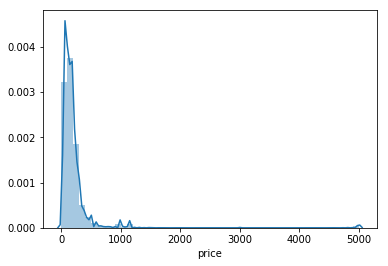

In [245]:
# check price distribution
sns.distplot(Boston_listings5['price'])
plt.show()

In [246]:
# find percentiles for price
Boston_listings5['price'].quantile(np.linspace(0.025, 1, 39 ,0))

0.025     35.0
0.050     40.0
0.075     48.0
0.100     50.0
0.125     56.0
0.150     61.0
0.175     68.0
0.200     74.0
0.225     76.0
0.250     83.0
0.275     90.0
0.300     98.0
0.325    100.0
0.350    100.0
0.375    110.0
0.400    120.0
0.425    125.0
0.450    133.0
0.475    143.0
0.500    150.0
0.525    150.0
0.550    160.0
0.575    170.0
0.600    175.0
0.625    181.0
0.650    189.0
0.675    195.0
0.700    200.0
0.725    202.0
0.750    220.0
0.775    230.0
0.800    249.0
0.825    259.0
0.850    283.0
0.875    299.0
0.900    325.0
0.925    379.0
0.950    495.0
0.975    799.0
Name: price, dtype: float64

In [247]:
# check high-end rooms
upperBound = Boston_listings5['price'].quantile(0.975)
Boston_listings4[['id', 'listing_url', 'name', 'price']][Boston_listings4['price'] > upperBound].sort_values('price', ascending = False)

,id,listing_url,name,price
3452,21678120,https://www.airbnb.com/rooms/21678120,Stayloom’s Remastered Retreat | near Fenway,5000.0
2316,17138041,https://www.airbnb.com/rooms/17138041,Stayloom's Downtown Destination | near Back Bay,5000.0
5532,29682207,https://www.airbnb.com/rooms/29682207,Stayloom's Charming Upscale Duplex | near T,5000.0
2767,19160270,https://www.airbnb.com/rooms/19160270,Stayloom's Saltspray Luxury | Beachfront,5000.0
2754,19141729,https://www.airbnb.com/rooms/19141729,Stayloom’s Saltspray Escape | Beachfront,5000.0
2746,19115873,https://www.airbnb.com/rooms/19115873,"Stayloom’s Upscale Oasis | Private deck, near T",5000.0
3857,22794472,https://www.airbnb.com/rooms/22794472,Stayloom’s Bright Buttonwood House | near T,5000.0
3861,22814449,https://www.airbnb.com/rooms/22814449,Stayloom’s Charming Home | near T,5000.0
3862,22814686,https://www.airbnb.com/rooms/22814686,Stayloom’s Upscale Destination | near T,5000.0
5534,29682306,https://www.airbnb.com/rooms/29682306,Stayloom's Darling Luxury Apartment | near T,5000.0


In [248]:
# check low-end rooms
Boston_listings4[['id', 'listing_url', 'name', 'price']][Boston_listings4['price'] == 0].sort_values('price', ascending = False)

,id,listing_url,name,price
3041,20268369,https://www.airbnb.com/rooms/20268369,Large Private Bedroom Close to Airport,0.0
3054,20349970,https://www.airbnb.com/rooms/20349970,"Walk To The Beach or City, room 7",0.0
3303,21237147,https://www.airbnb.com/rooms/21237147,West Rutland Square 1 bedroom PERFECTION!,0.0


# Data Cleaning

## Exclude Extreme and Missing Values

Now it is time to exclude extreme and missing values. The resulting data has covers 3,413 listings. The descriptive statistics looks more reasonable.  

In [249]:
# exclude extreme prices
Boston_listings6 = Boston_listings5[(Boston_listings5['price'] > 0) & (Boston_listings5['price'] <= upperBound)]
Boston_listings6.shape

(5999, 33)

In [250]:
# delete missing values
Boston_listings7= Boston_listings6.dropna()
Boston_listings7.shape

(3413, 33)

## Describe Cleaned Data

In [251]:
# describe numeric variables
Boston_listings7.describe().T

,count,mean,std,min,25%,50%,75%,max
price,3413.0,165.062701,107.388311,10.000000,85.000000,150.000000,200.000000,793.000000
security_deposit,3413.0,201.535013,299.529912,0.000000,0.000000,100.000000,300.000000,5000.000000
cleaning_fee,3413.0,70.922356,48.447971,0.000000,35.000000,69.000000,100.000000,495.000000
extra_people,3413.0,15.119836,21.490312,0.000000,0.000000,10.000000,25.000000,300.000000
distance_to_center,3413.0,3.956817,2.861771,0.086062,1.706904,3.096394,5.907249,14.833790
accommodates,3413.0,3.596543,2.237342,1.000000,2.000000,3.000000,4.000000,16.000000
bathrooms,3413.0,1.271462,0.515226,0.000000,1.000000,1.000000,1.500000,5.000000
bedrooms,3413.0,1.389979,0.942661,0.000000,1.000000,1.000000,2.000000,6.000000
beds,3413.0,1.915910,1.325959,1.000000,1.000000,1.000000,2.000000,16.000000
guests_included,3413.0,1.960738,1.499388,1.000000,1.000000,1.000000,2.000000,16.000000


In [252]:
# check correlations
Boston_listings7.corr()

,price,security_deposit,cleaning_fee,extra_people,distance_to_center,accommodates,bathrooms,bedrooms,beds,guests_included,...,is_far_south,is_middle_south,is_near_south,is_west,is_east,is_north,is_center,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
price,1.000000,0.227691,0.571801,-0.007209,-0.342939,0.547580,0.296419,0.490828,0.482359,0.380389,...,-0.172988,-0.189545,0.101669,-0.134562,-0.098897,0.077561,0.258644,0.564166,-0.551766,-0.088602
security_deposit,0.227691,1.000000,0.372077,0.080142,-0.095633,0.134269,0.080709,0.147286,0.134515,0.223218,...,-0.063461,-0.040167,-0.021175,-0.008466,-0.050981,-0.011425,0.120963,0.211529,-0.207434,-0.030078
cleaning_fee,0.571801,0.372077,1.000000,0.009618,-0.280402,0.510398,0.259072,0.457788,0.459962,0.409919,...,-0.133226,-0.164629,0.034093,-0.044032,-0.111058,0.025999,0.246815,0.556475,-0.544543,-0.085701
extra_people,-0.007209,0.080142,0.009618,1.000000,0.023865,0.037884,0.015497,0.051020,0.047872,0.203225,...,0.005170,0.019839,-0.009330,0.036939,-0.003136,-0.021472,-0.026068,-0.097293,0.091641,0.035208
distance_to_center,-0.342939,-0.095633,-0.280402,0.023865,1.000000,-0.042117,0.096422,0.088359,0.021855,-0.028267,...,0.572146,0.384136,-0.145444,0.368348,-0.060973,-0.098779,-0.646061,-0.381882,0.381627,0.013829
accommodates,0.547580,0.134269,0.510398,0.037884,-0.042117,1.000000,0.381834,0.798628,0.890447,0.571284,...,-0.026565,0.002908,0.007696,-0.041556,-0.018788,0.039723,0.026868,0.460952,-0.450115,-0.076396
bathrooms,0.296419,0.080709,0.259072,0.015497,0.096422,0.381834,1.000000,0.456618,0.394003,0.238965,...,0.002769,0.039518,0.040520,0.055486,-0.019434,0.072083,-0.127522,-0.027174,0.022725,0.026114
bedrooms,0.490828,0.147286,0.457788,0.051020,0.088359,0.798628,0.456618,1.000000,0.778924,0.524670,...,0.006951,0.087349,-0.001796,0.011094,0.002334,0.065496,-0.106704,0.270673,-0.266210,-0.034081
beds,0.482359,0.134515,0.459962,0.047872,0.021855,0.890447,0.394003,0.778924,1.000000,0.526386,...,-0.000684,0.043454,0.025748,-0.033642,-0.022744,0.048766,-0.043991,0.358613,-0.351581,-0.051502
guests_included,0.380389,0.223218,0.409919,0.203225,-0.028267,0.571284,0.238965,0.524670,0.526386,1.000000,...,-0.028578,0.004073,-0.037666,0.048605,-0.005434,0.000739,0.016683,0.326767,-0.319748,-0.050397


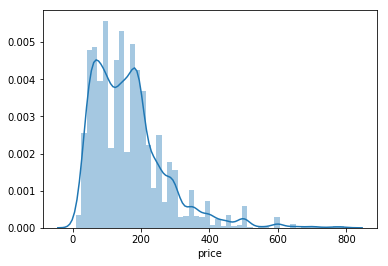

In [253]:
# check price distribution
sns.distplot(Boston_listings7['price'])
plt.show()

## Create Interactive Geoplots

In [254]:
# define dummyArea_to_categoryArea function
def dummyArea_to_categoryArea(row):
    '''
    Converts area dummy variables to a area categorical variable
    
    Args:
        boolean: 0, 1
    
    Returns:
        categorical: middle_south, near_south, west, east, north, center
    '''
    
    if row['is_far_south'] == 1:
        val = 'far_south'
    if row['is_middle_south'] == 1:
        val = 'middle_south'
    elif row['is_near_south'] == 1:
        val = 'near_south'
    elif row['is_west'] == 1:
        val = 'west'
    elif row['is_east'] == 1:
        val = 'east'
    elif row['is_north'] == 1:
        val = 'north'
    elif row['is_center'] == 1:
        val = 'center'
    return val

In [255]:
# convert area dummy variables to a area categorical variable
Boston_listings8 = Boston_listings7.copy()
Boston_listings8['area'] = Boston_listings8.apply(dummyArea_to_categoryArea, axis = 1)

In [256]:
# create box plot
trace0 = go.Box(x = Boston_listings8.loc[(Boston_listings8['area']=='far_south'), 'price'].values, name = "far_south")
trace1 = go.Box(x = Boston_listings8.loc[(Boston_listings8['area']=='middle_south'), 'price'].values, name = "middle_south")
trace2 = go.Box(x = Boston_listings8.loc[(Boston_listings8['area']=='near_south'), 'price'].values, name = "near_south")
trace3 = go.Box(x = Boston_listings8.loc[(Boston_listings8['area']=='west'), 'price'].values, name = "west")
trace4 = go.Box(x = Boston_listings8.loc[(Boston_listings8['area']=='east'), 'price'].values, name = "east")
trace5 = go.Box(x = Boston_listings8.loc[(Boston_listings8['area']=='north'), 'price'].values, name = "north")
trace6 = go.Box(x = Boston_listings8.loc[(Boston_listings8['area']=='center'), 'price'].values, name = "center")
trace= [trace0, trace1, trace2, trace3, trace4, trace5, trace6]
layout = go.Layout(xaxis=dict(title="Price"),
                   title="Airbnb Price Distribution")
figure = go.Figure(data=trace, layout=layout)
iplot(figure)

In [257]:
# create scatter plot
data = [go.Scattermapbox(lat = Boston_listings8['latitude'], 
                         lon = Boston_listings8['longitude'],
                         mode = 'markers',
                         marker = dict(size = 4, opacity = 0.5, 
                                       color = Boston_listings8['price'],
                                       colorbar = dict(title = 'Price'),
                                       colorscale = 'Jet'),
                         text = Boston_listings8['price'])]
layout = go.Layout(title = 'Airbnb Prices in Boston',
                   autosize = True,
                   hovermode = 'closest',
                   showlegend = False,
                   mapbox = dict(accesstoken = mapbox_access_token,
                                 bearing = 0,
                                 center = dict(lat = 42.3584300, lon = -71.0597700),
                                 pitch = 0,
                                 zoom = 9.5,
                                 style = 'light'))
figure = dict(data=data, layout=layout)
iplot(figure)

## Seperate Features and Targets

For model building, we need to seperate features and targets.

In [258]:
# create the target vector
y = Boston_listings7.iloc[:, Boston_listings7.columns == 'price']
y.shape

(3413, 1)

In [259]:
# create the features matrix
X = Boston_listings7.iloc[:, Boston_listings7.columns != 'price']
X.drop(['latitude', 'longitude'], axis = 1, inplace = True)
X.shape

(3413, 30)

## Split Data into Training and Test Sets

Next, we will split data into training and test sets. To get better prediction preformance, we also standardize features.

In [260]:
# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
print('Training Features Shape:', X_train.shape)
print('Training Lable Shape:', y_train.shape)
print('Test Features Shape:', X_test.shape)
print('Test Lable Shape:', y_test.shape)

Training Features Shape: (2559, 30)
Training Lable Shape: (2559, 1)
Test Features Shape: (854, 30)
Test Lable Shape: (854, 1)


In [261]:
# fit standardizer to training set
standardizer = StandardScaler()
standardizer.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [262]:
# apply to both training and test sets
X_trian_std = standardizer.transform(X_train)
X_test_std = standardizer.transform(X_test)

In [263]:
# covert labels to arrays
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

# Machine Learning Model - Lasso Regression

Now that we have explored and prepared the data, it's time to get down to modeling. Since we are interested in trying to predict the price of a rental property, this is essentially a regression problem.

First, we will model the renting price with [Lasso Regression](https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b) and examine the regularization parameter on coefficients of coefficients. R-squared score is quite decent (0.6).

In [264]:
# create a base Lasso Regression model
base_lasso = Lasso()

Text(0, 0.5, 'weights')

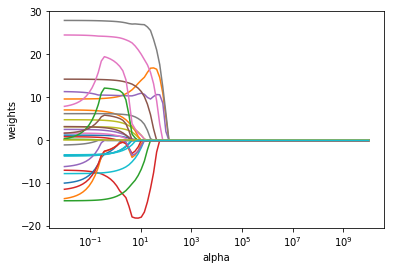

In [265]:
# examine effect Of alpha on Lasso Regression
alphas = 10**np.linspace(10,-2,100)*0.5
coefs = []
for a in alphas:
    base_lasso.set_params(alpha=a)
    base_lasso.fit(X_trian_std, y_train)
    coefs.append(base_lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [266]:
# examine effect Of alpha on coefficients
alphas = [0.05, 0.1, 0.25, 0.5, 0.75, 1, 5, 10, 20, 30, 40, 50]
coef_df = pd.DataFrame()
coef_df['Feature'] = X.columns
mse = []
for a in alphas:
    base_lasso.set_params(alpha=a)
    base_lasso.fit(X_trian_std, y_train)
    column_name = 'Alpha=%f' % a
    coef_df[column_name] = base_lasso.coef_
    y_pred_lasso = base_lasso.predict(X_test_std)
    mse.append(mean_squared_error(y_test, y_pred_lasso))
    
coef_df

,Feature,Alpha=0.050000,Alpha=0.100000,Alpha=0.250000,Alpha=0.500000,Alpha=0.750000,Alpha=1.000000,Alpha=5.000000,Alpha=10.000000,Alpha=20.000000,Alpha=30.000000,Alpha=40.000000,Alpha=50.000000
0,security_deposit,1.199619,1.179419,1.135694,1.050933,0.962741,0.852424,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,cleaning_fee,9.662009,9.698477,9.832021,10.048932,10.265548,10.512370,13.900371,16.124644,16.814779,14.139205,9.984675,5.414896
2,extra_people,0.200134,0.144321,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000
3,distance_to_center,-7.227420,-7.534202,-8.521633,-10.109043,-11.682714,-12.506740,-17.919945,-13.605010,-4.212205,-0.000000,-0.000000,-0.000000
4,accommodates,11.001459,10.616654,10.514956,10.466528,10.428763,10.413046,11.028435,9.800018,10.677889,10.603532,7.489413,2.055412
5,bathrooms,14.214042,14.179416,14.102610,13.983181,13.862807,13.732938,11.600226,7.940185,0.000000,0.000000,0.000000,0.000000
6,bedrooms,24.412851,24.287775,24.179606,24.023538,23.865320,23.669828,20.286502,17.253240,10.690933,2.884155,0.000000,0.000000
7,beds,-0.594810,-0.077991,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,guests_included,3.152098,3.130622,3.099096,2.960522,2.818117,2.687320,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,minimum_nights,-7.680117,-7.621551,-7.440603,-7.130312,-6.825134,-6.539981,-2.062962,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000


In [267]:
# examine effect Of alpha on MSE
mse_df = pd.DataFrame({'Alpha':alphas,'MSE':mse})
mse_df

,Alpha,MSE
0,0.05,4545.633654
1,0.10,4543.864511
2,0.25,4542.391921
3,0.50,4542.378707
4,0.75,4545.647110
5,1.00,4549.143546
6,5.00,4714.270446
7,10.00,5090.883719
8,20.00,5985.072970
9,30.00,6999.034642


In [268]:
# fit model using the best parameters
base_lasso.set_params(alpha=0.5)
base_lasso.fit(X_trian_std, y_train)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [269]:
# predict test data
y_pred_lasso = base_lasso.predict(X_test_std)

In [270]:
# caculate MSE, MAE, MAPE, and Accuracy
errors = abs(y_pred_lasso - y_test)
mae = round(np.mean(errors), 2)
mape = round(np.mean(100 * (errors / y_test)), 2)
accuracy = 100 - mape
print('Mean Squared Error: ', round(mean_squared_error(y_test, y_pred_lasso), 2))
print('Mean Absolute Error: ', mae)
print('Mean Absolute Percentage Error: ', mape)
print('Accuracy: ', accuracy, "%")
print('R-squared: ', round(r2_score(y_test, y_pred_lasso), 2))

Mean Squared Error:  4542.38
Mean Absolute Error:  45.49
Mean Absolute Percentage Error:  35.45
Accuracy:  64.55 %
R-squared:  0.6


In [271]:
# print a dataframe of feature parameters
coef_df[['Feature', 'Alpha=0.500000']]

,Feature,Alpha=0.500000
0,security_deposit,1.050933
1,cleaning_fee,10.048932
2,extra_people,0.000000
3,distance_to_center,-10.109043
4,accommodates,10.466528
5,bathrooms,13.983181
6,bedrooms,24.023538
7,beds,0.000000
8,guests_included,2.960522
9,minimum_nights,-7.130312


# Machine Learning Model - Random Forests Regression

Next, we will model the renting price with [Random Forests Regression](https://towardsdatascience.com/random-forest-in-python-24d0893d51c0) and study Importance of every feature. R-squared score is better (0.71).

According to feature importances ranking, the top 10 important features include room_type, bathrooms, bedrooms, accommodates, distance_to_center, cleaning_fee, security_deposit,  reviews_per_month, availability_365, host_listings_count, as expected.

In [272]:
# create a base Random Forest model
base_rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [273]:
# train the model on training data
base_rf.fit(X_trian_std , y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [274]:
# predict test data
y_pred_rf = base_rf.predict(X_test_std)

In [275]:
# caculate MSE, MAE, MAPE, and Accuracy
errors = abs(y_pred_rf - y_test)
mae = round(np.mean(errors), 2)
mape = round(np.mean(100 * (errors / y_test)), 2)
accuracy = 100 - mape
print('Mean Squared Error: ', round(mean_squared_error(y_test, y_pred_rf), 2))
print('Mean Absolute Error: ', mae)
print('Mean Absolute Percentage Error: ', mape)
print('Accuracy: ', accuracy, "%")
print('R-squared: ', round(r2_score(y_test, y_pred_rf), 2))

Mean Squared Error:  3231.25
Mean Absolute Error:  34.92
Mean Absolute Percentage Error:  25.33
Accuracy:  74.67 %
R-squared:  0.71


In [276]:
# create a dataframe of feature importances
feature_importances = pd.DataFrame()
feature_importances['feature'] = X.columns
feature_importances['importance'] = base_rf.feature_importances_
feature_importances_srt = feature_importances.sort_values(by='importance', ascending = False).reset_index()
feature_importances_srt

,index,feature,importance
0,27,room_type_Entire home/apt,0.313323
1,5,bathrooms,0.140919
2,3,distance_to_center,0.085789
3,1,cleaning_fee,0.073382
4,12,reviews_per_month,0.056184
5,11,availability_365,0.053891
6,6,bedrooms,0.035307
7,14,host_listings_count,0.034247
8,0,security_deposit,0.030529
9,4,accommodates,0.026276


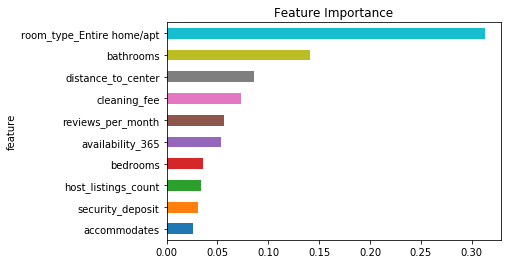

In [277]:
# plot Top important features
feature_importances_top = feature_importances_srt.iloc[0:10, :]
feature_importances_top.sort_values(by='importance', ascending = True, inplace = True)
feature_importances_top.plot(x = 'feature', y = 'importance', kind = 'barh', legend = False)
plt.title('Feature Importance')
plt.show()

# Linear Regression

## Linear Regression with Top Features

Because we are not only interested in accurate predictions, but also interested in clear interpretations. In order to make inference about the relationships between features and target, we fit a [linear regression](https://towardsdatascience.com/linear-regression-python-implementation-ae0d95348ac4) using top 10 features identified by Random Forests Regression. R-squared score is 0.55. Model results indicate there exists some multicollinearity issues.

In [286]:
# keep top features 
top_features = ['room_type_Entire home/apt',
                'room_type_Private room',
                'bathrooms', 
                'bedrooms',
                'accommodates',
                'distance_to_center',
                'cleaning_fee',
                'security_deposit',
                'reviews_per_month',
                'availability_365',
                'host_listings_count']
X1 = X[top_features]

In [287]:
# create a linear regression model
X1_cons = sm.add_constant(X1)
model1_ols = sm.OLS(y, X1_cons)

In [288]:
# fit linear regression
model1_result = model1_ols.fit()

In [289]:
# display model summary
print(model1_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     378.9
Date:                Tue, 07 May 2019   Prob (F-statistic):               0.00
Time:                        21:06:50   Log-Likelihood:                -19438.
No. Observations:                3413   AIC:                         3.890e+04
Df Residuals:                    3401   BIC:                         3.897e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

## Linear Regression with  Features of Interested

From the perspective of a homeowner, we are more interested in property characteristics such as room_type, bathrooms, bedrooms, and location. So we fit a linear regression using property characteristics again. In the reduced model, R-squared score is just slightly lower (0.53). But we get rid of multicollinearity issues successfully. 

Results show all property characteristics are statistically significant. More importantly, the coefficient estimates can assist us to evaluate the influence of each property characteristics on Airbnb daily renting price. For example, customer are willing to pay $38.13 for one bedroom.

In [282]:
# keep features of interested  
features_of_interested = ['bathrooms', 
                          'bedrooms',
                          'room_type_Entire home/apt',
                          'room_type_Private room',                          
                          'is_middle_south', 
                          'is_near_south', 
                          'is_west', 
                          'is_east',
                          'is_north',
                          'is_center']
X2 = X[features_of_interested]

In [283]:
# create a linear regression model
X2_cons = sm.add_constant(X2)
model2_ols = sm.OLS(y, X2_cons)

In [284]:
# fit linear regression
model2_result = model2_ols.fit()

In [285]:
# display model summary
print(model2_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     382.4
Date:                Tue, 07 May 2019   Prob (F-statistic):               0.00
Time:                        21:06:39   Log-Likelihood:                -19517.
No. Observations:                3413   AIC:                         3.906e+04
Df Residuals:                    3402   BIC:                         3.912e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

## Prediction based on Linear Regression with Features of Interested

Based on the above linear regression using property characteristics, we make predictions on various scenarios. Prediction results give estimated Airbnb daily renting price for different property characteristics. For instance, the estimated Airbnb daily renting price, for 1B1B apartment in downtown, is 199.59.

In [291]:
# load data for prediction
prediction_input = pd.read_csv('/Users/mengphilshen/Dropbox/Project/Data_Challenges/Proj_Airbnb/data/Boston/prediction_input.csv')
prediction_input.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 11 columns):
const                        192 non-null int64
bathrooms                    192 non-null int64
bedrooms                     192 non-null int64
room_type_Entire home/apt    192 non-null int64
room_type_Private room       192 non-null int64
is_middle_south              192 non-null int64
is_near_south                192 non-null int64
is_west                      192 non-null int64
is_east                      192 non-null int64
is_north                     192 non-null int64
is_center                    192 non-null int64
dtypes: int64(11)
memory usage: 16.6 KB


In [292]:
# make prediction based on Linear Regression with Features of Interested
model2_prediction = model2_result.predict(data_for_prediction)
prediction = prediction_input.assign(predicted_price = model2_prediction)
prediction.head()

,const,bathrooms,bedrooms,room_type_Entire home/apt,room_type_Private room,is_middle_south,is_near_south,is_west,is_east,is_north,is_center,predicted_price
0,1,1,1,1,0,1,0,0,0,0,0,136.741056
1,1,1,1,1,0,0,1,0,0,0,0,180.368893
2,1,1,1,1,0,0,0,1,0,0,0,134.500022
3,1,1,1,1,0,0,0,0,1,0,0,135.287626
4,1,1,1,1,0,0,0,0,0,1,0,190.674453


In [293]:
# convert room_type dummy variables to a room_type categorical variable
prediction['room_type'] = np.where(prediction['room_type_Entire home/apt'] == 1, 'Entire home/apt', 'Private room')
prediction.head()

,const,bathrooms,bedrooms,room_type_Entire home/apt,room_type_Private room,is_middle_south,is_near_south,is_west,is_east,is_north,is_center,predicted_price,room_type
0,1,1,1,1,0,1,0,0,0,0,0,136.741056,Entire home/apt
1,1,1,1,1,0,0,1,0,0,0,0,180.368893,Entire home/apt
2,1,1,1,1,0,0,0,1,0,0,0,134.500022,Entire home/apt
3,1,1,1,1,0,0,0,0,1,0,0,135.287626,Entire home/apt
4,1,1,1,1,0,0,0,0,0,1,0,190.674453,Entire home/apt


In [295]:
# redefine dummyArea_to_categoryArea2 function
def dummyArea_to_categoryArea2(row):
    '''
    Converts area dummy variables to a area categorical variable
    
    Args:
        boolean: 0, 1
    
    Returns:
        categorical: middle_south, near_south, west, east, north, center
    '''
    
    if row['is_middle_south'] == 1:
        val = 'middle_south'
    elif row['is_near_south'] == 1:
        val = 'near_south'
    elif row['is_west'] == 1:
        val = 'west'
    elif row['is_east'] == 1:
        val = 'east'
    elif row['is_north'] == 1:
        val = 'north'
    elif row['is_center'] == 1:
        val = 'center'
    return val

In [296]:
# convert area dummy variables to a area categorical variable
prediction['area'] = prediction.apply(dummyArea_to_categoryArea2, axis = 1)
prediction.head()

,const,bathrooms,bedrooms,room_type_Entire home/apt,room_type_Private room,is_middle_south,is_near_south,is_west,is_east,is_north,is_center,predicted_price,room_type,area
0,1,1,1,1,0,1,0,0,0,0,0,136.741056,Entire home/apt,middle_south
1,1,1,1,1,0,0,1,0,0,0,0,180.368893,Entire home/apt,near_south
2,1,1,1,1,0,0,0,1,0,0,0,134.500022,Entire home/apt,west
3,1,1,1,1,0,0,0,0,1,0,0,135.287626,Entire home/apt,east
4,1,1,1,1,0,0,0,0,0,1,0,190.674453,Entire home/apt,north


In [84]:
# output prediction for web-based analytics application
prediction.to_csv('/Users/mengphilshen/Dropbox/Project/Data_Challenges/Proj_Airbnb/data/Boston/prediction_output.csv')

# Conclusion

Through the data analysis, we gained interesting insights into the Boston's Airbnb rental market. For the question that we wished to answer at the beginning, we find that room type, size, and location are key drivers of rental price. 

From the insights we have derived, we would like to build a web-based analytics application to assist Boston-based property investors’ decision making process.